# DNM enrichment

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Allow relative imports
import os
import sys

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
# Change working directory
%cd /re_gecip/enhanced_interpretation/AlexBlakes/nmd_dnms

/nas/weka.gel.zone/re_gecip/enhanced_interpretation/AlexBlakes/nmd_dnms


In [4]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src import constants as C
from src import visualisation as vis

In [5]:
# Module constants
_LOG2_COLUMNS = ["relative_enrichment", "ci_l", "ci_r"]

In [6]:
# Colours and palettes
plt.style.use(C.STYLE_DEFAULT)
plt.style.use(C.COLOR_ENRICHMENT)
PALETTE = sns.color_palette()

In [7]:
def read_enrichment_data(path):
    df = pd.read_csv(
        path,
        sep="\t",
        index_col="csq",
    )
    return df


# def log2(df):
#     df[_LOG2_COLUMNS] = df[_LOG2_COLUMNS].applymap(np.log2)
#     return df


def adjust_ci(df):
    df = df.assign(ci_l=lambda x: abs(x["relative_enrichment"] - x["ci_l"]))
    df = df.assign(ci_r=lambda x: abs(x["relative_enrichment"] - x["ci_r"]))
    return df


def parse_data(path):
    return read_enrichment_data(path).pipe(adjust_ci)


# Load data
all_genes = parse_data("data/statistics/dnms_enrichment_all_genes.tsv")
morbid = parse_data("data/statistics/dnms_enrichment_morbid_genes.tsv")
non_morbid = parse_data("data/statistics/dnms_enrichment_non_morbid_genes.tsv")

# # Subset the morbid genes by mode of inheritance
morbid_ad = morbid[morbid["inheritance_simple"] == "AD"]
morbid_ar = morbid[morbid["inheritance_simple"] == "AR"]

In [8]:
def horizontal_bars(
    values,
    ax=None,
    **kwargs,
):

    kwargs.setdefault("tick_label", values.index)
    kwargs.setdefault("color", PALETTE)
    kwargs.setdefault("ecolor", [vis.adjust_lightness(c, 0.8) for c in PALETTE])

    if not ax:
        ax = plt.gca()

    n = len(values)  # Number of bars
    height = 1 - (1/n)
    y = np.arange(n)

    ax.barh(y=y, width=values, height=height, **kwargs)

    ax.axvline(x=1, linestyle="--", color="grey", alpha=0.5)

    return None

Text(0.5, 1.0, 'All genes')

Text(0.5, 1.0, 'Morbid genes\n(dominant)')

Text(0.5, 1.0, 'Morbid genes\n(recessive)')

Text(0.5, 1.0, 'Non-morbid genes')

(0.0, 16.0)

(0.0, 6.0)

Text(0.5, 0, 'Fold enrichment')

Text(0.5, 0, 'Fold enrichment')

Text(0.5, 0, 'Fold enrichment')

Text(0.5, 0, 'Fold enrichment')

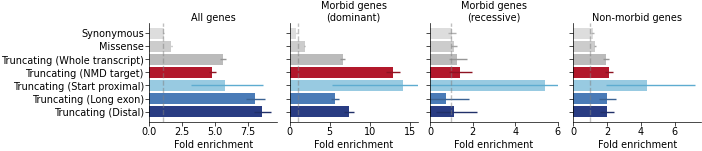

In [11]:
fig, axs = plt.subplots(
    1, 4, figsize=(18 * C.CM, 4 * C.CM), layout="constrained", sharey=True,
)

horizontal_bars(
    all_genes["relative_enrichment"],
    axs[0],
    xerr=[all_genes["ci_l"], all_genes["ci_r"]],
)

horizontal_bars(
    morbid_ad["relative_enrichment"],
    axs[1],
    xerr=[morbid_ad["ci_l"], morbid_ad["ci_r"]],
)

horizontal_bars(
    morbid_ar["relative_enrichment"],
    axs[2],
    xerr=[morbid_ar["ci_l"], morbid_ar["ci_r"]],
)

horizontal_bars(
    non_morbid["relative_enrichment"],
    axs[3],
    xerr=[non_morbid["ci_l"], non_morbid["ci_r"]],
)

axs[0].set_title("All genes")
axs[1].set_title("Morbid genes\n(dominant)")
axs[2].set_title("Morbid genes\n(recessive)")
axs[3].set_title("Non-morbid genes")

axs[1].set_xlim(0,16)
axs[2].set_xlim(0,6)

for ax in axs:
    ax.set_xlabel("Fold enrichment")
    
plt.savefig("data/plots/dnm_enrichment_constrained_regions.svg")
plt.savefig("data/plots/dnm_enrichment_constrained_regions.png", dpi=1000)